In [4]:
#1
import matplotlib
from matplotlib import pylab
import pandas as pd

cols = ['Season', 'TeamID', 'Wins', 'Losses', 'PPG', 'PAPG', 'RPG', 'APG', 'SPG', 'BPG', 'PFPG', 'TOPG']
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

temp_df = pd.read_csv("./MRegularSeasonDetailedResults.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")

tourney_temp_df = pd.read_csv("./MNCAATourneyDetailedResults.csv",
                        names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                        encoding = "ISO-8859-1")

reg_season_df = temp_df.drop(labels=0, axis=0)
tourney_df = tourney_temp_df.drop(labels=0, axis=0)

team_avgs = pd.DataFrame(columns=cols)
reg_season_df['Season'] = pd.to_numeric(reg_season_df['Season'])
tourney_df['Season'] = pd.to_numeric(tourney_df['Season'])

for year in years:
    year_df = reg_season_df[reg_season_df['Season'] == year]
    tourney_year_df = tourney_df[tourney_df['Season'] == year]
    dict = {}
    for index, row in tourney_year_df.iterrows():
        #print(row['WTeamID'])
        dict[int(row['WTeamID'])] = 1
        dict[int(row['LTeamID'])] = 1
    
    for key in dict:
        team_1211W = year_df[year_df['WTeamID'].apply(pd.to_numeric) == key]
        team_1211L = year_df[year_df['LTeamID'].apply(pd.to_numeric) == key]
        
        #print(f"key: ", key)
        #print(f"year: ", year)
        #print(f"w_df: ", team_1211W)
        #print(f"l_df: ", team_1211L)
    
        team_1211_Wdf = team_1211W[['Season', 'WTeamID', 'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
        team_1211_Ldf = team_1211L[['Season', 'LTeamID', 'LScore', 'WScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)


        
        w_sum = team_1211_Wdf.sum(axis=0, numeric_only=True)
        
        l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'WScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
        if not team_1211L.empty:
            l_sum = team_1211_Ldf.sum(axis=0, numeric_only=True)
        
        tot_games = (len(team_1211_Wdf.index) + len(team_1211_Ldf.index))

        #print(f"w_sum: ", w_sum)
        #print(f"l_sum: ", l_sum)
        season_total = (w_sum['Season'] + l_sum['Season']) / tot_games

        id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
        score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
        pa_total = (w_sum['LScore'] + l_sum['WScore']) / tot_games
        rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
        ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
        stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
        blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
        pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
        to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games

        #d = {'Season': [season_total], 'TeamID': [id_total], 'Wins': [len(team_1211_Wdf.index)], 'Losses': [len(team_1211_Ldf.index)], 'PPG': [score_total], 'PAPG': [pa_total], 'RPG': [rebs_total], 'APG': [ast_total], 'SPG': [stl_total], 'BPG': [blk_total], 'PFPG': [pf_total], 'TOPG': [to_total]}
        #temp_df = pd.DataFrame(data=d)
        team_avgs.loc[len(team_avgs.index)] = [season_total, id_total, len(team_1211_Wdf.index), len(team_1211_Ldf.index), score_total, pa_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total]
        #print(rows)

team_avgs

    

,Season,TeamID,Wins,Losses,PPG,PAPG,RPG,APG,SPG,BPG,PFPG,TOPG
0,2006.0,1284.0,18.0,14.0,64.843750,64.000000,32.656250,14.656250,7.656250,3.437500,16.937500,15.093750
1,2006.0,1214.0,16.0,15.0,66.806452,63.806452,39.225806,12.354839,7.645161,3.064516,20.870968,16.225806
2,2006.0,1104.0,17.0,12.0,69.965517,67.137931,37.000000,12.206897,6.344828,5.034483,13.827586,13.517241
3,2006.0,1266.0,19.0,10.0,74.206897,69.655172,35.551724,15.275862,7.517241,3.068966,19.482759,14.793103
4,2006.0,1130.0,25.0,7.0,74.531250,66.875000,35.187500,17.812500,5.937500,4.281250,16.500000,13.312500
...,...,...,...,...,...,...,...,...,...,...,...,...
932,2019.0,1205.0,20.0,11.0,75.774194,73.419355,32.870968,13.612903,6.225806,2.483871,16.193548,11.774194
933,2019.0,1439.0,24.0,8.0,74.000000,62.093750,32.593750,15.343750,6.656250,2.312500,15.281250,11.375000
934,2019.0,1387.0,23.0,12.0,67.057143,63.742857,39.771429,12.971429,7.085714,4.057143,17.485714,12.714286
935,2019.0,1449.0,26.0,8.0,69.823529,64.382353,31.588235,11.676471,9.000000,5.735294,18.411765,13.352941


In [5]:
#2
import random

random.seed()

# make a new empty dataframe to hold all of the data

# note: "Winner" column will always be '1' because the winning team is always listed first;
# it's included just for a classification metric for the machine learning
train_cols = ["Season", "Team1ID", "Team2ID", "Winner", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team2W", "Team2L", "Team2PPG", "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG"]

train_DF = pd.DataFrame(columns=train_cols)

# we just need three columns from our tourney_df
trim_tourney_df = tourney_df[["Season", "WTeamID", "LTeamID"]]
trim_tourney_df

for year in years:
    avg_year_df = team_avgs[team_avgs['Season'] == year]
    tourney_year_df = trim_tourney_df[trim_tourney_df['Season'] == year].apply(pd.to_numeric)
    
    for index, row in tourney_year_df.iterrows():
        # make a list that we can insert into the new dataframe
        #first 4 values (last value is the "Winner" classification which is randomly chosen)
        
        #randomly choose which slot the winning team goes into
        winning_team = random.randint(1,2)
        losing_team = 2 if winning_team == 1 else 1
        
        #properly put winning team into correct row
        team_id = ["", "WTeamID", "LTeamID"]
        temp_list = [year, row[team_id[winning_team]], row[team_id[losing_team]], winning_team]
        team1_row = avg_year_df[avg_year_df["TeamID"] == temp_list[1]][cols[2:]].values.tolist()
        team2_row = avg_year_df[avg_year_df["TeamID"] == temp_list[2]][cols[2:]].values.tolist()
        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=train_cols)
        train_DF = train_DF.append(temp_series, ignore_index=True)

test_data = train_DF[train_DF['Season'] == 2019]
test_labels = test_data['Winner']
test_data = test_data.drop(columns=['Winner'])

train_data = train_DF[train_DF['Season'] != 2019]
train_labels = train_data['Winner']
train_data = train_data.drop(columns=['Winner'])


train_DF
#train_data
        
        

    

,Season,Team1ID,Team2ID,Winner,Team1W,Team1L,Team1PPG,Team1PAPG,Team1RPG,Team1APG,...,Team2W,Team2L,Team2PPG,Team2PAPG,Team2RPG,Team2APG,Team2SPG,Team2BPG,Team2PFPG,Team2TOPG
0,2006.0,1214.0,1284.0,2.0,16.0,15.0,66.806452,63.806452,39.225806,12.354839,...,18.0,14.0,64.843750,64.000000,32.656250,14.656250,7.656250,3.437500,16.937500,15.093750
1,2006.0,1266.0,1104.0,2.0,19.0,10.0,74.206897,69.655172,35.551724,15.275862,...,17.0,12.0,69.965517,67.137931,37.000000,12.206897,6.344828,5.034483,13.827586,13.517241
2,2006.0,1334.0,1130.0,2.0,22.0,7.0,73.724138,63.586207,35.172414,15.655172,...,25.0,7.0,74.531250,66.875000,35.187500,17.812500,5.937500,4.281250,16.500000,13.312500
3,2006.0,1181.0,1380.0,1.0,30.0,3.0,82.515152,68.969697,32.909091,15.363636,...,19.0,12.0,65.774194,64.516129,38.806452,12.354839,7.580645,3.806452,17.870968,17.580645
4,2006.0,1375.0,1196.0,2.0,23.0,6.0,74.103448,65.896552,33.931034,14.172414,...,27.0,6.0,79.272727,64.787879,35.242424,17.030303,8.030303,4.939394,16.121212,14.878788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2019.0,1246.0,1120.0,2.0,27.0,6.0,76.727273,65.424242,38.424242,13.848485,...,25.0,9.0,78.882353,68.588235,33.676471,14.411765,9.294118,4.764706,18.382353,12.147059
919,2019.0,1277.0,1181.0,1.0,28.0,6.0,78.823529,65.529412,40.911765,18.941176,...,29.0,5.0,83.500000,67.558824,41.764706,15.911765,9.470588,6.823529,15.852941,13.117647
920,2019.0,1277.0,1403.0,2.0,28.0,6.0,78.823529,65.529412,40.911765,18.941176,...,26.0,6.0,73.093750,59.281250,34.281250,14.031250,7.375000,4.906250,17.781250,12.375000
921,2019.0,1120.0,1438.0,2.0,25.0,9.0,78.882353,68.588235,33.676471,14.411765,...,29.0,3.0,71.843750,55.062500,34.625000,14.500000,5.625000,3.812500,14.656250,9.031250


In [6]:
#3
reg_2022_df = pd.read_csv("./2022RegularSeason.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")
reg_2022_df = reg_2022_df.drop(labels=0, axis=0)
tourney_team_ids = [1211, 1112,1242,1124, 1120, 1246,1437, 1181, 1458, 1397,1345,1403,1417, 1228, 1344, 1116, 1163, 1222, 1388, 1234, 1104, 1261, 1400, 1161, 1425, 1293,1277, 1326, 1129, 1314, 1361,1371, 1166, 1395, 1266, 1272, 1362, 1274, 1260, 1172,1235, 1276,1461,1353,1231, 1439, 1323,1412,1350,1308,1151, 1355, 1436,1103, 1255,1463, 1159, 1286, 1174,1389,1240,1168,1209, 1313, 1460, 1136,1411, 1394]
team_avgs_2022 = pd.DataFrame(columns=cols)

for key in tourney_team_ids:
    team_wins = reg_2022_df[reg_2022_df['WTeamID'] == str(key)]
    team_losses = reg_2022_df[reg_2022_df['LTeamID'] == str(key)]
    
    team_win_df = team_wins[['Season', 'WTeamID', 'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
    team_loss_df = team_losses[['Season', 'LTeamID', 'LScore', 'WScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)

    w_sum = team_win_df.sum(axis=0, numeric_only=True)

    l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
    if not team_losses.empty:
        l_sum = team_loss_df.sum(axis=0, numeric_only=True)

    tot_games = (len(team_win_df.index) + len(team_loss_df.index))
    season_total = (int(w_sum['Season']) + int(l_sum['Season'])) / tot_games
    id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
    score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
    pa_total = (w_sum['LScore'] + l_sum['WScore']) / tot_games
    rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
    ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
    stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
    blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
    pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
    to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games
       
    team_avgs_2022.loc[len(team_avgs_2022.index)] = [season_total, id_total, len(team_win_df.index), len(team_loss_df.index), score_total, pa_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total]
team_avgs_2022


,Season,TeamID,Wins,Losses,PPG,PAPG,RPG,APG,SPG,BPG,PFPG,TOPG
0,2022.0,1211.0,26.0,3.0,87.827586,65.344828,41.482759,18.206897,6.655172,5.862069,15.413793,11.758621
1,2022.0,1112.0,31.0,3.0,84.558824,67.529412,41.352941,19.911765,6.705882,5.705882,16.470588,13.176471
2,2022.0,1242.0,28.0,6.0,78.588235,68.147059,37.352941,15.441176,6.411765,4.147059,15.911765,12.500000
3,2022.0,1124.0,26.0,6.0,76.500000,63.625000,37.125000,15.843750,8.812500,3.406250,15.843750,12.500000
4,2022.0,1120.0,27.0,5.0,78.718750,67.031250,39.937500,14.593750,8.781250,7.937500,18.562500,12.093750
...,...,...,...,...,...,...,...,...,...,...,...,...
63,2022.0,1313.0,24.0,6.0,75.100000,63.733333,38.766667,12.633333,6.700000,3.666667,17.666667,14.000000
64,2022.0,1460.0,21.0,13.0,75.470588,71.058824,34.882353,13.941176,5.764706,2.941176,14.382353,12.294118
65,2022.0,1136.0,22.0,9.0,77.903226,72.741935,41.548387,14.096774,6.322581,4.451613,16.806452,13.903226
66,2022.0,1411.0,18.0,12.0,69.233333,65.500000,39.533333,10.833333,5.566667,5.000000,17.800000,14.933333


In [7]:
#4
d = {'Team1ID': [1353,1460,1411,1461,1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120,1211,1308,1323,1277,1124,1388,1400,1293,1112,1222,1276,1326,1242,1350,1235,1274,1211,1403,1314,1345,1112,1276,1242,1235,1116,1314,1222,1242,1181,1437,1314], 'Team2ID': [1323,1136,1394,1231,1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1231,1103,1439,1463,1362,1389,1460,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240,1272,1116,1403,1181,1314,1417,1345,1389,1395,1228,1397,1437,1166,1344,1458,1120,1116,1181,1417,1389,1222,1437,1344,1274,1181,1389,1437,1274,1314,1242,1242]}
test_cols = ["Season", "Team1ID", "Team2ID", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team2W", "Team2L", "Team2PPG", "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG"]
temp_tourn_df = pd.DataFrame(data=d)
#winners = [2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,2,2,2,2,2,2,2,1,1,1,2,1,2,1,1,2,2,1,2,2,2,1,2,2,1,2,1,2,2,2]
tourney_2022_df = pd.DataFrame(columns=test_cols)

for row in temp_tourn_df.iterrows():
    #Doing the same as before but without winner column
    temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
    print(f"team2: ", row[1]['Team2ID'])
    team1_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team1ID']].values.tolist()
    team2_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team2ID']].values.tolist()
    print(team2_row)
    team1_row[0].pop(0)
    team1_row[0].pop(0)
    team2_row[0].pop(0)
    team2_row[0].pop(0)

    temp_list.extend(team1_row[0])
    temp_list.extend(team2_row[0])
        
    # add that list to our DF
    temp_series = pd.Series(temp_list, index=test_cols)
    tourney_2022_df = tourney_2022_df.append(temp_series, ignore_index=True)

tourney_2022_df

team2:  1323
[[2022.0, 1323.0, 22.0, 10.0, 72.5, 66.84375, 34.0625, 14.15625, 5.09375, 1.875, 12.875, 10.34375]]
team2:  1136
[[2022.0, 1136.0, 22.0, 9.0, 77.90322580645162, 72.74193548387096, 41.54838709677419, 14.096774193548388, 6.32258064516129, 4.451612903225806, 16.806451612903224, 13.903225806451612]]
team2:  1394
[[2022.0, 1394.0, 23.0, 11.0, 76.91176470588235, 69.94117647058823, 38.35294117647059, 15.029411764705882, 8.5, 1.7352941176470589, 20.264705882352942, 14.205882352941176]]
team2:  1231
[[2022.0, 1231.0, 20.0, 13.0, 71.48484848484848, 65.93939393939394, 36.27272727272727, 14.93939393939394, 5.7272727272727275, 4.96969696969697, 17.303030303030305, 11.878787878787879]]
team2:  1209
[[2022.0, 1209.0, 18.0, 10.0, 70.60714285714286, 64.75, 37.25, 13.535714285714286, 8.928571428571429, 4.464285714285714, 15.75, 11.857142857142858]]
team2:  1272
[[2022.0, 1272.0, 21.0, 10.0, 75.41935483870968, 68.38709677419355, 38.74193548387097, 16.06451612903226, 8.709677419354838, 5.6774

,Season,Team1ID,Team2ID,Team1W,Team1L,Team1PPG,Team1PAPG,Team1RPG,Team1APG,Team1SPG,...,Team2W,Team2L,Team2PPG,Team2PAPG,Team2RPG,Team2APG,Team2SPG,Team2BPG,Team2PFPG,Team2TOPG
0,2022.0,1353.0,1323.0,18.0,13.0,67.903226,65.806452,35.354839,14.967742,7.225806,...,22.0,10.0,72.500000,66.843750,34.062500,14.156250,5.093750,1.875000,12.875000,10.343750
1,2022.0,1460.0,1136.0,21.0,13.0,75.470588,71.058824,34.882353,13.941176,5.764706,...,22.0,9.0,77.903226,72.741935,41.548387,14.096774,6.322581,4.451613,16.806452,13.903226
2,2022.0,1411.0,1394.0,18.0,12.0,69.233333,65.500000,39.533333,10.833333,5.566667,...,23.0,11.0,76.911765,69.941176,38.352941,15.029412,8.500000,1.735294,20.264706,14.205882
3,2022.0,1461.0,1231.0,25.0,8.0,72.969697,65.484848,35.818182,11.363636,3.969697,...,20.0,13.0,71.484848,65.939394,36.272727,14.939394,5.727273,4.969697,17.303030,11.878788
4,2022.0,1211.0,1209.0,26.0,3.0,87.827586,65.344828,41.482759,18.206897,6.655172,...,18.0,10.0,70.607143,64.750000,37.250000,13.535714,8.928571,4.464286,15.750000,11.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2022.0,1222.0,1437.0,29.0,5.0,75.823529,58.882353,39.235294,16.735294,8.235294,...,26.0,7.0,72.636364,63.090909,34.939394,12.060606,6.242424,2.272727,15.242424,10.000000
63,2022.0,1242.0,1274.0,28.0,6.0,78.588235,68.147059,37.352941,15.441176,6.411765,...,23.0,10.0,74.818182,71.030303,30.454545,14.030303,8.727273,2.939394,14.939394,9.606061
64,2022.0,1181.0,1314.0,28.0,6.0,80.176471,67.147059,38.294118,16.911765,6.470588,...,24.0,9.0,77.515152,71.727273,39.757576,14.818182,5.424242,3.848485,14.363636,11.666667
65,2022.0,1437.0,1242.0,26.0,7.0,72.636364,63.090909,34.939394,12.060606,6.242424,...,28.0,6.0,78.588235,68.147059,37.352941,15.441176,6.411765,4.147059,15.911765,12.500000


Trial 1: 0.08955223880597014
Trial 2: 0.4626865671641791
Trial 3: 0.7611940298507462
Trial 4: 0.34328358208955223
Trial 5: 0.8805970149253731
Trial 6: 0.40298507462686567
Trial 7: 0.2835820895522388
Trial 8: 0.9701492537313433
Trial 9: 0.6567164179104478


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Trial 10: 0.26865671641791045
Trial 11: 0.1044776119402985
Trial 12: 0.40298507462686567
Trial 13: 0.13432835820895522
Trial 14: 0.13432835820895522
Trial 15: 0.3283582089552239
Trial 16: 0.4925373134328358
Trial 17: 0.5970149253731343
Trial 18: 0.5522388059701493
Trial 19: 0.05970149253731343
Trial 20: 1.0
Trial 21: 0.0
Trial 22: 0.582089552238806
Trial 23: 0.11940298507462686
Trial 24: 1.0
Trial 25: 0.08955223880597014
Trial 26: 0.8955223880597015
Trial 27: 0.1791044776119403
Trial 28: 0.6567164179104478
Trial 29: 0.1791044776119403
Trial 30: 1.0
Trial 31: 0.7761194029850746
Trial 32: 0.19402985074626866
Trial 33: 0.5373134328358209
Trial 34: 0.34328358208955223
Trial 35: 0.6716417910447762
Trial 36: 0.7313432835820896
Trial 37: 0.07462686567164178
Trial 38: 0.1791044776119403
Trial 39: 0.16417910447761194
Trial 40: 0.8507462686567164
Trial 41: 0.014925373134328358
Trial 42: 0.6567164179104478
Trial 43: 0.07462686567164178
Trial 44: 0.1791044776119403
Trial 45: 0.582089552238806
Tria

(array([2. , 1.8, 1.4, 1.2, 0.8, 1.2, 0.8, 0.2, 0.6, 0.6, 0.2, 1.2, 0.8,
        1. , 0.4, 1.2, 0.4, 1. , 0.8, 2.4]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

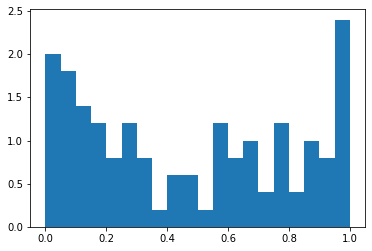

In [34]:
#5
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import numpy as np

model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
predictions = model.predict(test_data)


# Correlation checking
big_corr = []
for m in range(1):
    for n in range(10):
        corr = []
        for i in range(10):
            model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
            predictions1 = model.predict(test_data)
            model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
            predictions2 = model.predict(test_data)
            sum1 = 0
            for j in range(len(predictions1)):
                sum1 = sum1 + 1 if predictions1[j] == predictions2[j] else sum1

            sum1 /= len(predictions1)
#            corr.append(sum1)
            big_corr.append(sum1)
            print(f"Trial {m*100 + n*10 + i + 1}: {sum1}")

#        avg = sum(corr) / len(corr)
#        print(avg)
#        big_corr.append(avg)
#        corr.clear()
#    print(f"Overall correlation average: {sum(big_corr)/len(big_corr)}")
#    big_corr.clear()


plt.hist(big_corr, density=True, bins=20)

In [11]:
#6
winners = [2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,2,2,2,2,2,2,2,1,1,1,2,1,2,1,1,2,2,1,2,2,2,1,2,2,1,2,1,2,2,2]
vegas_winners = [2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,2,2,1,1,1,2,2,1,2,2,2,1,1,2,1,1,2,1,2,2,1,1,1,1,2,2]
vright = 0
vwrong = 0

for i in range(0,len(vegas_winners)-1):
    if vegas_winners[i] == winners[i]:
        vright += 1
    else:
        vwrong += 1

#print(f"# of Games correct: ",right)
#print(f"# of Games missed: ",wrong)
#print(f"Accuracy: ", (right) / (right + wrong))

print(f"Vegas # of Games correct: ",vright)
print(f"Vegas # of Games missed: ",vwrong)
print(f"Vegas Accuracy: ", (vright) / (vright + vwrong))

Vegas # of Games correct:  41
Vegas # of Games missed:  26
Vegas Accuracy:  0.6119402985074627


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def accuracy(preds):
    right = 0
    wrong = 0
    for i in range(0,len(preds)):
        if preds[i] == winners[i]:
            right += 1
        else:
            wrong += 1
    return right / (right + wrong)

bayes_model = MultinomialNB().fit(train_data, train_labels)
bayes_preds = bayes_model.predict(tourney_2022_df)
print(f"Naive Bayes: ", accuracy(bayes_preds))

tree_model = DecisionTreeClassifier().fit(train_data, train_labels)
tree_preds = tree_model.predict(tourney_2022_df)
print(f"Decision Tree: ", accuracy(tree_preds))

forest_model = RandomForestClassifier().fit(train_data, train_labels)
forest_preds = forest_model.predict(tourney_2022_df)
print(f"Random Forest: ", accuracy(forest_preds))
print(f"MLP Acc: ", accuracy(predictions))



Naive Bayes:  0.5373134328358209
Decision Tree:  0.582089552238806
Random Forest:  0.5373134328358209
MLP Acc:  0.5223880597014925


In [26]:
#7
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

xgb.set_config(verbosity=0)

train_df_year = train_DF[train_DF["Season"] >= 2010]
X = train_df_year.drop("Season", axis=1)
X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
y = train_df_year["Winner"]
y = y.astype(int)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.values)

X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

accuracy_scores = []
#for i in range(20):
#    from sklearn.model_selection import train_test_split
#    X_train, X_test, y_train, y_test = train_test_split(
#        X_proc, y, stratify=y)

#    from sklearn.metrics import accuracy_score

#    xgb_cl = xgb.XGBClassifier()

    # Model Fit
#    xgb_cl.fit(X_train, y_train)

    # Model Prediction
#    preds = xgb_cl.predict(X_test)

    # Accuracy Score
#    accuracy_scores.append(accuracy_score(y_test, preds))
    
#for i in range(len(accuracy_scores)):
#    print(f"Trial {i}: {accuracy_scores[i]}")
#print(f"Average accuracy: {sum(accuracy_scores)/len(accuracy_scores)}")

In [27]:
#8
X = train_df_year.drop("Season", axis=1)
X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
y = train_df_year["Winner"]
y = y.astype(int)

test_X = tourney_2022_df.drop(["Season", "Team1ID", "Team2ID"], axis=1)
#print(test_X)

scaled_X = scaler.fit_transform(X.values)
scaled_test = scaler.fit_transform(test_X.values)
X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)
test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

xgb_cl.fit(X_proc, y)

preds = xgb_cl.predict(test_proc)
print(f"Prediction: ", accuracy(preds))
print(preds)
    #print(f"Trial {i}: {accuracy(preds)}")

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction 19:  0.5223880597014925
[2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 2 2 1 1
 1 2 2 1 2 2 1 1 1 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 1 2]


In [36]:
#9
from sklearn import svm
svm_cl = svm.SVC()
svm_cl.fit(X_proc, y)

svm_preds = svm_cl.predict(test_proc)
print(f"Prediction: ", accuracy(svm_preds))
print(svm_preds)

Prediction:  0.5970149253731343
[2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 2 2 2 2 2 1 1
 2 2 2 1 2 2 1 1 1 2 2 1 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 1 2 2]


In [37]:
#10
firstRound = {'Team1ID': [1353,1460,1411,1461,1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120], 'Team2ID': [1323,1136,1394,1231,1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1461,1103,1439,1463,1362,1389,1136,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240]}
firstFour = {'Team1ID': [1353,1460,1411,1461], 'Team2ID': [1323,1136,1394,1231]}
bracket_df = pd.DataFrame(data=firstRound)
ff_df = pd.DataFrame(data=firstFour)

def tournament(round_bracket, round_num):
    if round_num >= 7:
        return
    
    round_df = pd.DataFrame(columns=test_cols)
    for row in round_bracket.iterrows():
        temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
        team1_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team1ID']].values.tolist()
        team2_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team2ID']].values.tolist()
        team1_row[0].pop(0)
        team1_row[0].pop(0)
        team2_row[0].pop(0)
        team2_row[0].pop(0)

        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=test_cols)
        round_df = round_df.append(temp_series, ignore_index=True)
        
    #print(round_df)
    round_X = round_df.drop(["Season", "Team1ID", "Team2ID"], axis=1)
    scaled_test = scaler.fit_transform(round_X.values)
    round_proc = pd.DataFrame(scaled_test, index = round_X.index, columns = round_X.columns)
    
    #print(round_proc)
    preds = svm_cl.predict(round_proc)
    print(f"Round {round_num}")
    print(preds)
    
    #if(round_num == 1):
        #return;
    
    round_dict = {'Team1ID': [], 'Team2ID': []}
    for i in range(0 if round_num != 1 else 4, len(preds)):
        if i % 2 == 0:
            length = len(round_dict['Team1ID'])
            val = 0
            if preds[i] == 1:
                val = round_bracket.iloc[i]['Team1ID']
            else:
                val = round_bracket.iloc[i]['Team2ID']
                
            round_dict['Team1ID'].append(val)
        else:
            length = len(round_dict['Team2ID'])
            val = 0
            if preds[i] == 1:
                val = round_bracket.iloc[i]['Team1ID']
            else:
                val = round_bracket.iloc[i]['Team2ID']
                
            round_dict['Team2ID'].append(val)
    new_df = pd.DataFrame(data=round_dict)
    tournament(new_df, round_num+1)
        
#tournament(ff_df, 1) 
tournament(bracket_df, 1)  

Round 1
[2 2 2 1 1 1 1 2 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 2 2 1]
Round 2
[1 2 2 2 1 2 1 1 1 1 2 2 1 1 2 2]
Round 3
[1 2 1 2 1 1 1 2]
Round 4
[2 2 1 2]
Round 5
[2 1]
Round 6
[2]


ValueError: arrays must all be same length